# Overview of PyLandStats

In [1]:
import pylandstats as pls

## Landscape analysis

We can load landscapes from raster files and compute pandas data frames of patch, class and landscape level. See the notebook [01-landscape-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/01-landscape-analysis.ipynb) for more thorough demonstration.

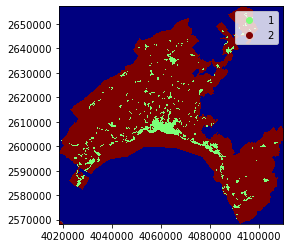

In [2]:
ls = pls.Landscape('../data/clc/vaud_g100_clc00_V18_5.tif')
ls.plot_landscape(legend=True)

In [3]:
patch_metrics_df = ls.compute_patch_metrics_df()
patch_metrics_df.head()

,class_val,area,perimeter,perimeter_area_ratio,shape_index,fractal_dimension,euclidean_nearest_neighbor
patch_id,,,,,,,
0,1,115.0,10600.0,92.173913,2.409091,1.129654,1431.782106
1,1,13.0,2600.0,200.000000,1.625000,1.100096,223.606798
2,1,2.0,600.0,300.000000,1.000000,1.011893,223.606798
3,1,69.0,6000.0,86.956522,1.764706,1.087917,316.227766
4,1,76.0,8800.0,115.789474,2.444444,1.136721,316.227766


In [4]:
class_metrics_df = ls.compute_class_metrics_df()
class_metrics_df

,total_area,proportion_of_landscape,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,...,fractal_dimension_md,fractal_dimension_ra,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv
class_val,,,,,,,,,,,,,,,,,,,,,
1,24729.0,7.701939,193,0.060111,2.069921,1431600.0,4.458771,22.949206,128.129534,2201.712038,...,1.081665,0.200096,0.035772,3.298134,1023.354950,707.998485,781.024968,6772.087205,879.913199,85.983187
2,296346.0,92.298061,13,0.004049,89.451374,1431600.0,4.458771,10.053260,22795.846154,278596.402199,...,1.069990,0.206571,0.056823,5.322120,246.645899,202.442542,223.606798,116.227766,38.386100,15.563243


In [5]:
landscape_metrics_df = ls.compute_landscape_metrics_df()
landscape_metrics_df

,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
0,321075.0,206,0.064159,89.451374,1431600.0,4.458771,9.716931,1558.616505,257308.652318,43.0,...,0.037678,3.477259,974.33933,241.380151,700.0,6772.087205,872.438139,89.541509,73.40177,0.271429


## Spatio-temporal analysis

Given a temporally-ordered sequence of landscape snapshots, we can also analyze the spatio-temporal patterns of landscape change. To that end, PyLandStats can compute pandas dataframes with the evolution of the metrics and plot them, both at the class and landscape level. See the notebook [02-spatiotemporal-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/02-spatiotemporal-analysis.ipynb) for a more thorough demonstration.

<a id='spatiotemporal-analysis'></a>

In [6]:
input_filepaths = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=[2000, 2006, 2012])

In [7]:
sta.class_metrics_df

metric          total_area proportion_of_landscape number_of_patches  \
class_val dates                                                        
1         2000       24729                 7.70194               193   
          2006       24599                 7.66145               200   
          2012       24766                 7.71346               201   
2         2000      296346                 92.2981                13   
          2006      296476                 92.3386                 8   
          2012      296309                 92.2865                 8   

metric          patch_density largest_patch_index  total_edge edge_density  \
class_val dates                                                              
1         2000      0.0601106             2.06992  1.4316e+06      4.45877   
          2006      0.0622907             2.02227   1.436e+06      4.47248   
          2012      0.0626022             2.02227  1.4459e+06      4.50331   
2         2000      0.0040489             89.4514  1.4316e+06      4.45877   
          2006     0.00249163             89.1318   1.436e+06      4.47248   
          2012     0.00249163             89.0916  1.4459e+06      4.50331   

metric          landscape_shape_index  area_mn  area_am  ...  \
class_val dates                                          ...   
1         2000                22.9492   128.13  2201.71  ...   
          2006                23.0892  122.995  2031.22  ...   
          2012                 23.181  123.214  2019.46  ...   
2         2000                10.0533  22795.8   278596  ...   
          2006                10.0744  37059.5   276495  ...   
          2012                10.1175  37038.6   276399  ...   

metric          fractal_dimension_md fractal_dimension_ra  \
class_val dates                                             
1         2000               1.08167             0.200096   
          2006               1.08076             0.195545   
          2012               1.07917             0.195545   
2         2000               1.06999             0.206571   
          2006               1.08792             0.194132   
          2012               1.08792             0.194539   

metric          fractal_dimension_sd fractal_dimension_cv  \
class_val dates                                             
1         2000             0.0357722              3.29813   
          2006               0.03525              3.25178   
          2012             0.0347995              3.20964   
2         2000             0.0568234              5.32212   
          2006             0.0548953              5.01883   
          2012             0.0550874              5.03546   

metric          euclidean_nearest_neighbor_mn euclidean_nearest_neighbor_am  \
class_val dates                                                               
1         2000                        1023.35                       707.998   
          2006                        1003.28                        703.96   
          2012                        1005.07                       703.368   
2         2000                        246.646                       202.443   
          2006                        239.112                       202.436   
          2012                        239.112                       202.426   

metric          euclidean_nearest_neighbor_md euclidean_nearest_neighbor_ra  \
class_val dates                                                               
1         2000                        781.025                       6772.09   
          2006                         721.11                       6772.09   
          2012                        728.011                       6772.09   
2         2000                        223.607                       116.228   
          2006                        223.607                           100   
          2012                        223.607                           100   

metric          euclidean_nearest_neighbo

In [8]:
sta.landscape_metrics_df

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,321075,206,0.0641595,89.4514,1.4316e+06,4.45877,9.71693,1558.62,257309,43,...,0.0376779,3.47726,974.339,241.38,700,6772.09,872.438,89.5415,73.4018,0.271429
2006,321075,208,0.0647824,89.1318,1.436e+06,4.47248,9.73633,1543.63,255467,45,...,0.0362519,3.34304,973.887,240.86,714.109,6772.09,878.977,90.2545,73.4629,0.270422
2012,321075,209,0.0650938,89.0916,1.4459e+06,4.50331,9.77998,1536.24,255235,45,...,0.0358375,3.30423,975.747,241.066,721.11,6772.09,872.972,89.4671,73.3309,0.271715


We can also plot the time series of metrics at the class level, e.g., the evolution of the proportion of landscape occupied by the land use class value `1` (urban):

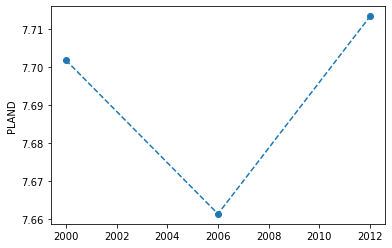

In [9]:
sta.plot_metric('proportion_of_landscape', class_val=1)

or we can also plot at the landscape level by not providing any `class_val` argument, e.g., the evolution of the area-weighted mean fractal dimension of all the patches of the landscape:

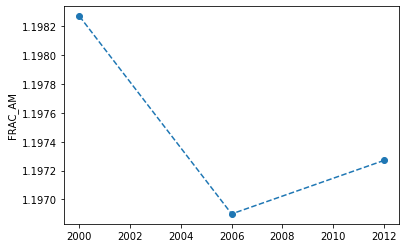

In [10]:
sta.plot_metric('fractal_dimension_am')

## Gradient analysis

Gradient analysis consists on evaluating the spatial variation of the landscape patterns as one moves progressively from the highly-developed urban cores to the less intense suburbs until the rural and natural hinterlands. See the notebook [03-gradient-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/03-gradient-analysis.ipynb) for a more thorough demonstration.

<a id='gradient-analysis'></a>

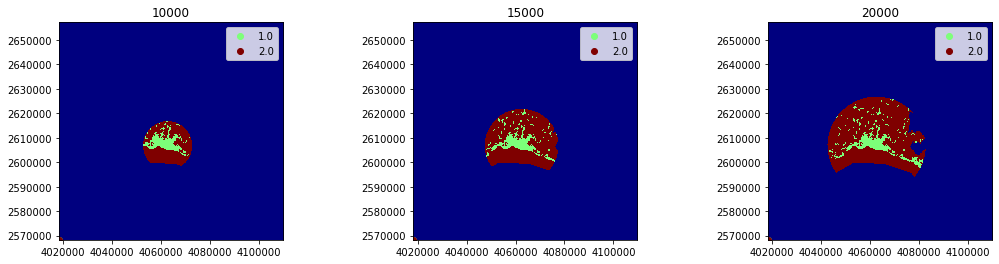

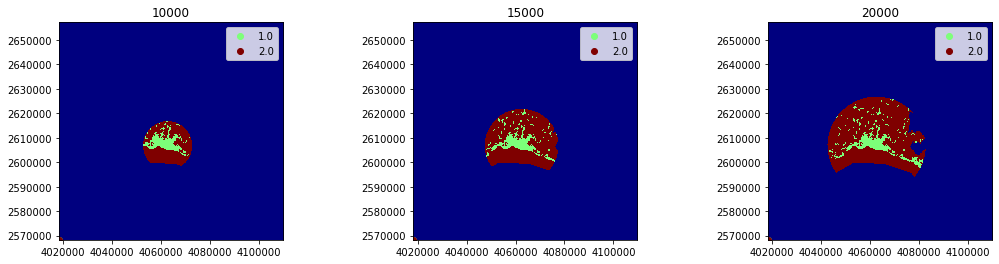

In [11]:
from shapely.geometry import Point

# latitude and longitude of the center of Lausanne according to OpenStreetMap
base_mask = Point(6.6327025, 46.5218269)
base_mask_crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

# buffer distances (in meters)
buffer_dists = [10000, 15000, 20000]

# initialize a `BufferAnalysis` instance
ba = pls.BufferAnalysis(
    '../data/clc/vaud_g100_clc00_V18_5.tif', base_mask, buffer_dists, 
    base_mask_crs=base_mask_crs)

# plot the landscape
ba.plot_landscapes()

In [12]:
ba.class_metrics_df.head()

metric                 total_area proportion_of_landscape number_of_patches  \
class_val buffer_dists                                                        
1.0       10000              7261                 24.9648                20   
          15000              9630                 16.7106                46   
          20000             12149                 13.3476                76   
2.0       10000             21824                 75.0352                 4   
          15000             47998                 83.2894                 4   

metric                 patch_density largest_patch_index total_edge  \
class_val buffer_dists                                                
1.0       10000             0.068764             21.5472     223900   
          15000            0.0798223             11.5326     395200   
          20000            0.0834981             7.30169     565200   
2.0       10000            0.0137528             74.3614     223900   
          15000           0.00694107             82.9493     395200   

metric                 edge_density landscape_shape_index  area_mn  area_am  \
class_val buffer_dists                                                        
1.0       10000             7.69813               6.74269   363.05  5421.13   
          15000             6.85778               10.1472  209.348  4633.62   
          20000             6.20962               12.9638  159.855  3861.51   
2.0       10000             7.69813               4.96622     5456  21434.8   
          15000             6.85778               5.79499  11999.5  47607.3   

metric                  ... fractal_dimension_md fractal_dimension_ra  \
class_val buffer_dists  ...                                             
1.0       10000         ...              1.08318             0.163172   
          15000         ...              1.07944             0.141302   
          20000         ...              1.08242             0.167805   
2.0       10000         ...              1.06453             0.134831   
          15000         ...              1.06453             0.145607   

metric                 fractal_dimension_sd fractal_dimension_cv  \
class_val buffer_dists                                             
1.0       10000                   0.0434689               4.0267   
          15000                   0.0309886              2.85544   
          20000                   0.0344727              3.18956   
2.0       10000                   0.0538049              4.98227   
          15000                   0.0579905              5.35649   

metric                 euclidean_nearest_neighbor_mn  \
class_val buffer_dists                                 
1.0       10000                              633.891   
          15000                              768.449   
          20000                              825.643   
2.0       10000                              211.803   
          15000                              223.607   

metric                 euclidean_nearest_neighbor_am  \
class_val buffer_dists                                 
1.0       10000                              278.966   
          15000                              348.027   
          20000                               386.53   
2.0       10000                              200.209   
          15000                              223.607   

metric                 euclidean_nearest_neighbor_md  \
class_val buffer_dists                                 
1.0       10000                              423.607   
          15000                              695.965   
          20000                               721.11   
2.0       10000                              211.803   
          15000                              223.607   

metric                 euclidean_nearest_neighbor_ra  \
class_val buffer_dists                                 
1.0       10000                              1699.93   
          15000                              1686.89   
  

In [13]:
ba.landscape_metrics_df.head()

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
buffer_dists,,,,,,,,,,,,,,,,,,,,,
10000,29085,24,0.0825168,74.3614,223900,7.69813,4.3962,1211.88,17437,49.5,...,0.0453557,4.20122,563.543,219.87,380.278,1723.54,448.984,79.6716,47.8398,0.561948
15000,57628,50,0.0867634,82.9493,395200,6.85778,5.3368,1152.56,40426.1,42,...,0.033956,3.12948,724.862,244.398,616.228,1686.89,446.514,61.5999,57.1656,0.451268
20000,91020,81,0.0889914,86.3151,565200,6.20962,6.2351,1123.7,68328.4,40,...,0.036423,3.36974,788.841,224.95,632.456,2218.68,535.714,67.9116,62.2993,0.392942


Analogously to the spatio-temporal analysis, we can use the `plot_metric` method to plot how the computed metrics respond to increasing buffer distances, e.g., how the proportion of landscape occupied by the land use class value `1` (urban) as we increase the buffer distance

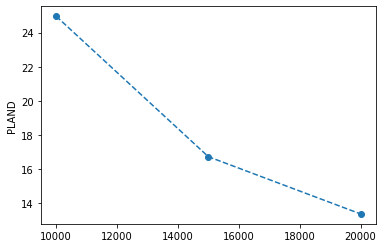

In [14]:
ba.plot_metric('proportion_of_landscape', class_val=1)

Like in the spatio-temporal analysis, the plots at the landscape level can obtained by not providing any `class_val` argument.

## Spatio-temporal buffer analysis

Landscape metrics are very sensitive to the spatial extent of the considered map. Therefore, we might also want to evaluate how the computed time series of metrics responds to changes in the map extent. This is why PyLandStats features an additional `SpatioTemporalBufferAnalysis` analysis class. See the notebook [04-spatiotemporal-buffer-analysis.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb) for a more thorough demonstration.

Let us take the sequence of landscapes `input_filepaths` from [the spatio-temporal analysis above](#spatiotemporal-analysis) and let us use again the `dates` argument to specify the dates that correspond to each landscape.
Let us also take the latitude and longitude of the center of Lausanne as well as the buffer distances defined in [the gradient analysis above](#gradient-analysis). Now we can construct our `SpatioTemporalBufferAnalysis` instance and evaluate the sensitive of our spatio-temporal analysis to the extent of the map:

In [15]:
stba = pls.SpatioTemporalBufferAnalysis(
    input_filepaths, base_mask, buffer_dists, base_mask_crs=base_mask_crs,
    dates=[2000, 2006, 2012])

In [16]:
stba.class_metrics_df

metric                      total_area proportion_of_landscape  \
buffer_dist class_val dates                                      
10000       1.0       2000        7261                 24.9648   
                      2006        7205                 24.7722   
                      2012        7205                 24.7722   
            2.0       2000       21824                 75.0352   
                      2006       21880                 75.2278   
                      2012       21880                 75.2278   
15000       1.0       2000        9630                 16.7106   
                      2006        9278                 16.0998   
                      2012        9320                 16.1727   
            2.0       2000       47998                 83.2894   
                      2006       48350                 83.9002   
                      2012       48308                 83.8273   
20000       1.0       2000       12149                 13.3476   
                      2006       11827                 12.9938   
                      2012       11882                 13.0543   
            2.0       2000       78871                 86.6524   
                      2006       79193                 87.0062   
                      2012       79138                 86.9457   

metric                      number_of_patches patch_density  \
buffer_dist class_val dates                                   
10000       1.0       2000                 20      0.068764   
                      2006                 20      0.068764   
                      2012                 20      0.068764   
            2.0       2000                  4     0.0137528   
                      2006                  4     0.0137528   
                      2012                  4     0.0137528   
15000       1.0       2000                 46     0.0798223   
                      2006                 49     0.0850281   
                      2012                 50     0.0867634   
            2.0       2000                  4    0.00694107   
                      2006                  4    0.00694107   
                      2012                  4    0.00694107   
20000       1.0       2000                 76     0.0834981   
                      2006                 78     0.0856955   
                      2012                 79     0.0867941   
            2.0       2000                  5     0.0054933   
                      2006                  6    0.00659196   
                      2012                  7    0.00769062   

metric                      largest_patch_index total_edge edge_density  \
buffer_dist class_val dates                                               
10000       1.0       2000              21.5472     223900      7.69813   
                      2006              21.0211     226600      7.79096   
                      2012              21.0211     227000      7.80471   
            2.0       2000              74.3614     223900      7.69813   
                      2006              74.5539     226600      7.79096   
                      2012              74.5539     227000      7.80471   
15000       1.0       2000              11.5326     395200      6.85778   
                      2006              11.2671     391300       6.7901   
                      2012              11.2671     395500      6.86298   
            2.0       2000              82.9493     395200      6.85778   
                      2006              83.5601     391300       6.7901   
                      2012              83.4872     395500      6.86298   
20000       1.0       2000              7.30169     565200      6.20962   
                      2006               7.1336     566200      6.22061   
                      2012               7.1336     571400      6.27774   
            2.0       2000              86.3151     565200      6.20962   
                      2006              86.6678     566200      6.22

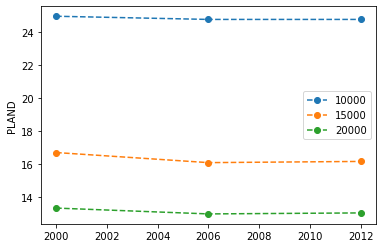

In [17]:
stba.plot_metric('proportion_of_landscape', class_val=1)